# Abgabe SMD Blatt 06 
### von Nico Guth, David Venker, Jan Jäkel

## Aufgabe 13 Fisher-Diskriminante: Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.size'] = 15

In [3]:
# Daten einlesen
p0 = pd.read_hdf('zwei_populationen.h5', key='P_0_10000')
p1 = pd.read_hdf('zwei_populationen.h5', key='P_1')
p0_1000 = pd.read_hdf('zwei_populationen.h5', key='P_0_1000')

In [4]:
print(p0.describe())
print(p1.describe())
print(p0_1000.describe())

                  x             y
count  10000.000000  10000.000000
mean      -0.007300      2.963676
std        3.543263      2.615033
min      -13.311864     -6.828857
25%       -2.398417      1.245018
50%        0.000262      2.965853
75%        2.348454      4.699709
max       15.451051     13.777433
                  x             y
count  10000.000000  10000.000000
mean       6.096272      3.174674
std        3.471670      2.308153
min       -5.672639     -5.123931
25%        3.763049      1.634243
50%        6.062341      3.139753
75%        8.488399      4.733547
max       20.355251     11.910529
                 x            y
count  1000.000000  1000.000000
mean     -0.026781     3.015787
std       3.473659     2.579017
min      -9.817560    -5.590628
25%      -2.373706     1.337761
50%       0.069495     2.981503
75%       2.400815     4.815889
max      10.001318    11.843885


## a) Mittelwerte

In [5]:
mu_p0 = p0.mean()
mu_p1 = p1.mean()

In [6]:
print(f'mu_p0 = \n{mu_p0}')
print(f'mu_p1 = \n{mu_p1}')

mu_p0 = 
x   -0.007300
y    2.963676
dtype: float64
mu_p1 = 
x    6.096272
y    3.174674
dtype: float64


## b) Kovarianzmatrix

In [7]:
V_p0 = p0.cov()
V_p1 = p1.cov()
print(f'V_p0 = \n{V_p0}')
print(f'V_p1 = \n{V_p1}')

V_p0 = 
           x         y
x  12.554716  8.360258
y   8.360258  6.838396
V_p1 = 
           x        y
x  12.052492  7.21376
y   7.213760  5.32757


In [8]:
V_p0p1 = (V_p0 + V_p1)/2
print(f'V_p0p1 = \n{V_p0p1}')

V_p0p1 = 
           x         y
x  12.303604  7.787009
y   7.787009  6.082983


## c) lineare Fisher-Diskriminante und Geradengleichung

$\vec{\lambda}=\lambda\cdot\vec{e}_\vec{\lambda}$

$\vec{\lambda} = S_W^{-1} \cdot (\vec{\mu}_1-\vec{\mu}_2)$

In [9]:
V_p0p1_inverse = np.linalg.inv(V_p0p1)
print(f'V_p0p1_inverse = \n{V_p0p1_inverse}')

V_p0p1_inverse = 
[[ 0.42822518 -0.5481839 ]
 [-0.5481839   0.86613968]]


In [10]:
lambda_ = V_p0p1_inverse @ (mu_p0-mu_p1)
print(f'lambda = \n{lambda_}')

lambda = 
[-2.49803764  3.16312642]


Geradengleichung: $\vec{x}=x' \cdot \vec{\lambda}$

In [11]:
def gerade(x,lambda_):
    return x*lambda_[0],x*lambda_[1]

### Plot der Populationen

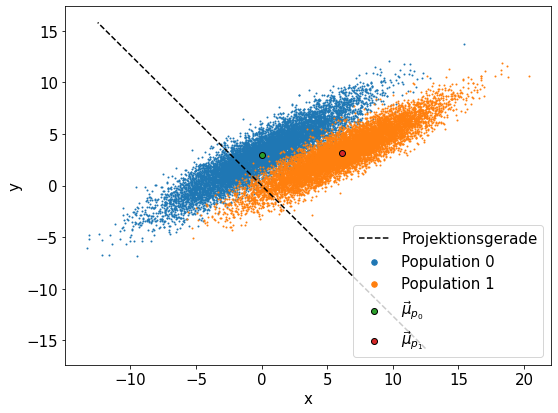

In [12]:
plt.figure(figsize=(8,6))

plt.scatter(p0['x'],p0['y'],s=1,label='Population 0')
plt.scatter(p1['x'],p1['y'],s=1,label='Population 1')
plt.scatter(mu_p0['x'],mu_p0['y'], edgecolor='k',label=r'$\vec{\mu}_{p_0}$')
plt.scatter(mu_p1['x'],mu_p1['y'], edgecolor='k',label=r'$\vec{\mu}_{p_1}$')

projection_linspace = np.linspace(-5,5,100) 
projection_line = gerade(projection_linspace,lambda_)
plt.plot(projection_line[0],projection_line[1],'k--',label='Projektionsgerade')

plt.xlabel('x')
plt.ylabel('y')

legend = plt.legend()
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.tight_layout()
plt.show()

## d) Projektion der Populationen

In [13]:
p0_projected = np.dot(p0,lambda_)
p1_projected = np.dot(p1,lambda_)

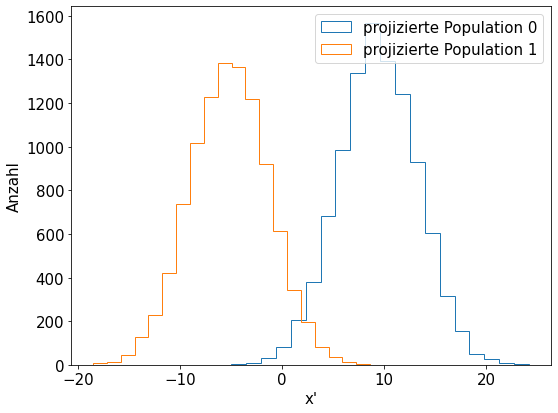

In [14]:
plt.figure(figsize=(8,6))
plt.hist(p0_projected,histtype='step',bins=20,label='projizierte Population 0')
plt.hist(p1_projected,histtype='step',bins=20,label='projizierte Population 1')
plt.xlabel('x\'')
plt.ylabel('Anzahl')
plt.legend()
plt.tight_layout()
plt.show()

## e) Vergleich der verschiedenen $\lambda_{cut}$

In [15]:
lambda_cut_linspace = np.linspace(-10,10,10000)

In [16]:
# p0 ist positiv (Signal), p1 ist negativ (Untergrund)
# true and false, positive and negative
tp = np.array([np.sum(p0_projected > lambda_cut) for lambda_cut in lambda_cut_linspace])
fp = np.array([np.sum(p1_projected > lambda_cut) for lambda_cut in lambda_cut_linspace])
tn = np.array([np.sum(p1_projected <= lambda_cut) for lambda_cut in lambda_cut_linspace])
fn = np.array([np.sum(p0_projected <= lambda_cut) for lambda_cut in lambda_cut_linspace])

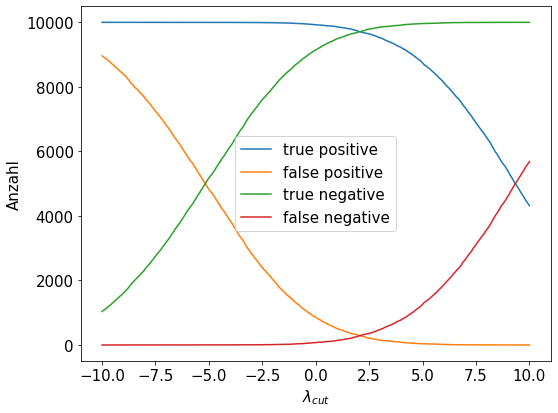

In [17]:
plt.figure(figsize=(8,6))

plt.plot(lambda_cut_linspace, tp, label='true positive')
plt.plot(lambda_cut_linspace, fp, label='false positive')
plt.plot(lambda_cut_linspace, tn, label='true negative')
plt.plot(lambda_cut_linspace, fn, label='false negative')

plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Anzahl')

plt.legend()
plt.tight_layout()
plt.show()

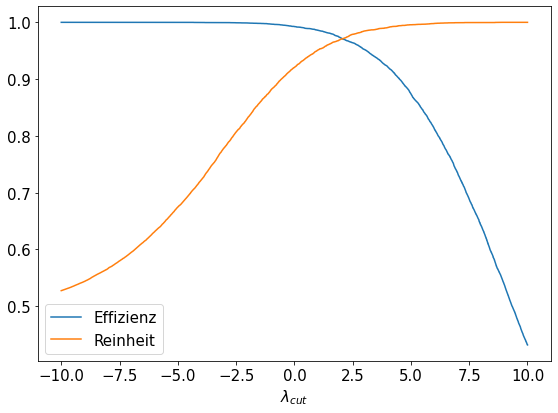

In [18]:
efficiency = tp/(tp+fn)
purity = tp/(tp+fp)

plt.figure(figsize=(8,6))

plt.plot(lambda_cut_linspace,efficiency,label='Effizienz')
plt.plot(lambda_cut_linspace,purity,label='Reinheit')

plt.xlabel(r'$\lambda_{cut}$')

plt.legend()
plt.tight_layout()
plt.show()

In [19]:
intersect_mask = np.isclose(efficiency,purity,rtol=0.0001)
print(f'Schnittpunkt:\n{lambda_cut_linspace[intersect_mask][0]}\n{efficiency[intersect_mask][0]}')

Schnittpunkt:
2.0652065206520653
0.9709


## f) Bei welchem Wert von $\lambda_{cut}$ wird nach der Trennung das Signal-zu-Untergrundverhältnis $S/B$ maximal?

In [59]:
mask = fp>0
S = tp[mask]
B = fp[mask]

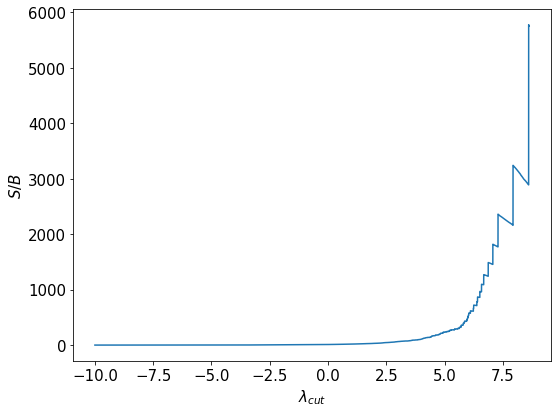

In [62]:
SB = S/B

plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace[mask],SB)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/B$')
plt.tight_layout()
plt.show()

In [61]:
lambda_cut_max_f = lambda_cut_linspace[np.argmax(SB)]
SB_max = SB[np.argmax(SB)]
print(f'Maximum von S/B:\n{lambda_cut_max_f}\n{SB_max}')

Maximum von S/B:
8.60986098609861
5779.0


## g) Bei welchem Wert von $\lambda_{cut}$ wird nach der Trennung die Signifikanz $S/\sqrt{S+B}$ maximal?

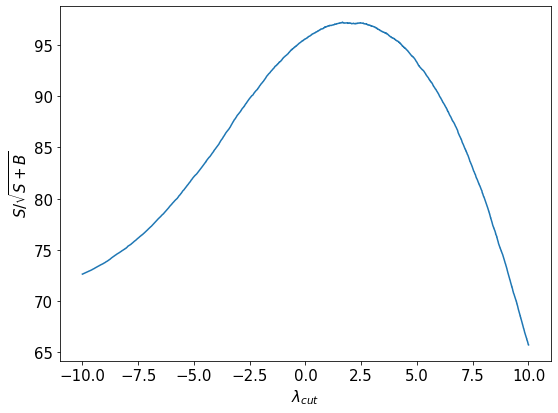

In [40]:
significance = S/np.sqrt(S+B)

plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace,significance)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/\sqrt{S+B}$')
plt.tight_layout()
plt.show()

In [41]:
lambda_cut_max_g = lambda_cut_linspace[np.argmax(significance)]
significance_max = significance[np.argmax(significance)]
print(f'Maximum von S/sqrt(S+B):\n{lambda_cut_max_g}\n{significance_max}')

Maximum von S/sqrt(S+B):
1.6531653165316538
97.20812685713084


## h) Wiederhole a) bis g) für $p_{0,1000}$ statt $p_0$

Code von vorher kopiert und an jede Variable ein '_h' geschrieben.

In [42]:
p0_h = p0_1000
mu_p0_h = p0_1000.mean()
V_p0_h = p0_1000.cov()
V_p0p1_h = (V_p0_h + V_p1)/2
V_p0p1_inverse_h = np.linalg.inv(V_p0p1_h)
lambda_h = V_p0p1_inverse_h @ (mu_p0_h-mu_p1)

### Plot der Populationen

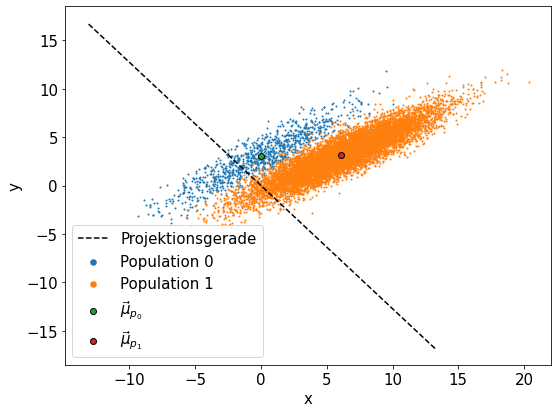

In [43]:
plt.figure(figsize=(8,6))

plt.scatter(p0_h['x'],p0_h['y'],s=1,label='Population 0')
plt.scatter(p1['x'],p1['y'],s=1,label='Population 1')
plt.scatter(mu_p0_h['x'],mu_p0_h['y'], edgecolor='k',label=r'$\vec{\mu}_{p_0}$')
plt.scatter(mu_p1['x'],mu_p1['y'], edgecolor='k',label=r'$\vec{\mu}_{p_1}$')

projection_linspace_h = np.linspace(-5,5,100) 
projection_line_h = gerade(projection_linspace_h,lambda_h)
plt.plot(projection_line_h[0],projection_line_h[1],'k--',label='Projektionsgerade')

plt.xlabel('x')
plt.ylabel('y')

legend = plt.legend()
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.tight_layout()
plt.show()

### Plot der Projektion

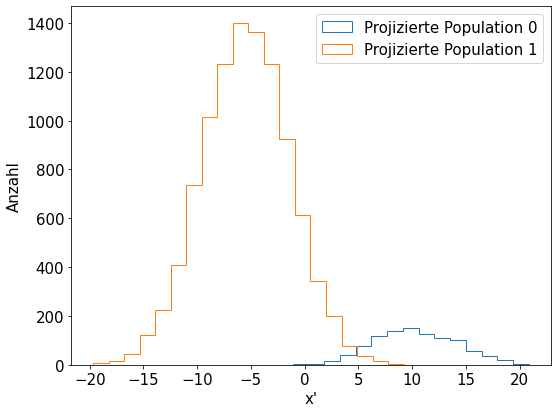

In [44]:
p0_projected_h = np.dot(p0_h,lambda_h)
p1_projected_h = np.dot(p1,lambda_h)
plt.figure(figsize=(8,6))
plt.hist(p0_projected_h,histtype='step',bins=20,label='Projizierte Population 0')
plt.hist(p1_projected_h,histtype='step',bins=20,label='Projizierte Population 1')
plt.xlabel('x\'')
plt.ylabel('Anzahl')
plt.legend()
plt.tight_layout()
plt.show()

### Vergleich von verschiedenen $\lambda_{cut}$

In [45]:
lambda_cut_linspace_h = np.linspace(-10,10,10000)

In [46]:
# p0 ist positiv (Signal), p1 ist negativ (Untergrund)
# true and false, positive and negative
tp_h = np.array([np.sum(p0_projected_h > lambda_cut) for lambda_cut in lambda_cut_linspace_h])
fp_h = np.array([np.sum(p1_projected_h > lambda_cut) for lambda_cut in lambda_cut_linspace_h])
tn_h = np.array([np.sum(p1_projected_h <= lambda_cut) for lambda_cut in lambda_cut_linspace_h])
fn_h = np.array([np.sum(p0_projected_h <= lambda_cut) for lambda_cut in lambda_cut_linspace_h])

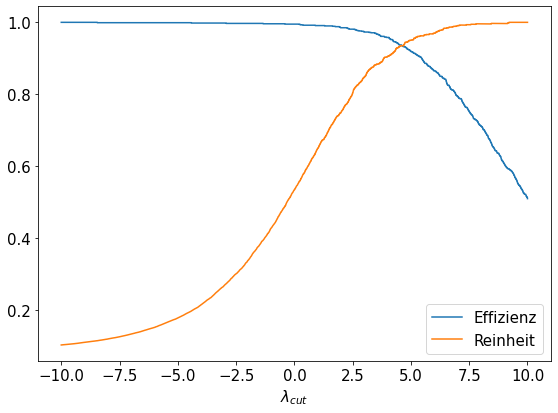

In [47]:
efficiency_h = tp_h/(tp_h+fn_h)
purity_h = tp_h/(tp_h+fp_h)

plt.figure(figsize=(8,6))

plt.plot(lambda_cut_linspace_h,efficiency_h,label='Effizienz')
plt.plot(lambda_cut_linspace_h,purity_h,label='Reinheit')

plt.xlabel(r'$\lambda_{cut}$')

plt.legend()
plt.tight_layout()
plt.show()

In [48]:
intersect_mask_h = np.isclose(efficiency_h,purity_h)
print(f'Schnittpunkt:\n{lambda_cut_linspace_h[intersect_mask_h][0]}\n{efficiency_h[intersect_mask_h][0]}')

Schnittpunkt:
4.609460946094609
0.935


In [54]:
S_h = tp_h
B_h = fp_h

<ipython-input-55-7328b7d25170>:1: RuntimeWarning: divide by zero encountered in true_divide
  SB_h = S_h/B_h


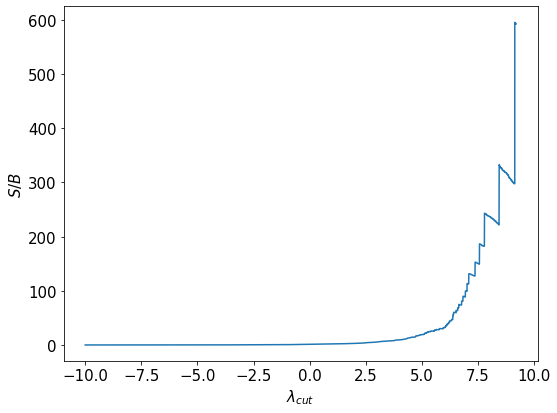

In [55]:
SB_h = S_h/B_h

plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace_h,SB_h)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/B$')
plt.tight_layout()
plt.show()

In [56]:
lambda_cut_max_f_h = lambda_cut_linspace_h[np.argmax(SB_h)]
SB_max_h = SB_h[np.argmax(SB_h)]
print(f'Maximum von S/B:\n{lambda_cut_max_f_h}\n{SB_max_h}')

Maximum von S/B:
9.205920592059208
inf


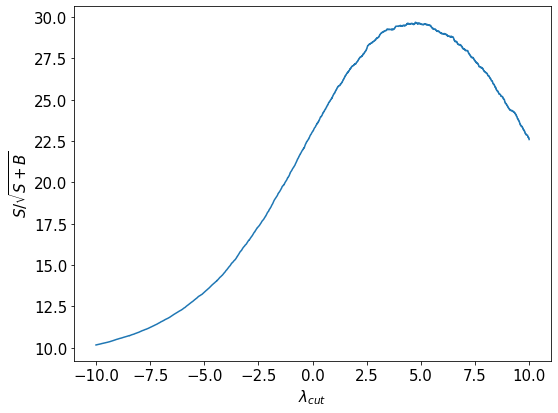

In [57]:
significance_h = S_h/np.sqrt(S_h+B_h)

plt.figure(figsize=(8,6))
plt.plot(lambda_cut_linspace_h,significance_h)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel(r'$S/\sqrt{S+B}$')
plt.tight_layout()
plt.show()

In [58]:
lambda_cut_max_g_h = lambda_cut_linspace_h[np.argmax(significance_h)]
significance_max_h = (S/np.sqrt(S+B))[np.argmax(significance_h)]
print(f'Maximum von S/sqrt(S+B):\n{lambda_cut_max_g_h}\n{significance_max_h}')

Maximum von S/sqrt(S+B):
4.743474347434743
93.9960529906976


### Vergleich von der Analyse mit 10000 Samples zu 1000 Samples

Durch weniger Werte hat sich der Mittelpunkt der Population 0 etwas verschoben und die Projektionsgerade hat eine etwas andere Steigung.  
Im Projektions-Histogram ist Population 0 deutlich flacher, da natürlich nur $1/10$ der Punkte zur Verfügung stehen. 

Schnittpunkte von Effizienz und Reinheit:  
$p_0: (1.033, 0.971)$  
$p_{0,1000}: (2.305, 0.935)$  
Also ist mit 1000 Samples ein geringerer Schnittpunkt von Effizienz und Reinheit zu finden.  
Das heißt mit weniger Werten kann auch nur ein schlechterer Kompromiss zwischen Effizienz und Reinheit gefunden werden.  
Außerdem ist der Schnittpunkt weiter rechts und schneidet somit mehr Punkte von der Signal Population ab.  

Auch $S/B$ und $S/\sqrt{S+B}$ haben sich verschoben.  
Maximum von $S/B$:  
$p_0 : (0.827, 17.393)$  
$p_{0,1000} : (2.373, 7.577)$  
Maximum von $S/\sqrt{S+B}$:  
$p_0 : (0.763, 96.240)$  
$p_{0,1000} : (2.025, 91.574)$  
Auch hier sind die Maxima deutlich geringer bei weniger Samples.  
Somit zeigt sich auch hier, dass mehr Samples zu besseren Ergebnissen führen.